## Second Order Taskonomy

In [1]:
import pandas as pd
import numpy as np
import pickle
# Import from folder outside 
import sys
sys.path.append('/l/users/shikhar.srivastava/workspace/hover_net/')
from taskonomy.utils.task_affinity import calculate_affinity_distance
from taskonomy.utils.log_utils import read_metric_logs
import matplotlib.pyplot as plt
import seaborn as sns

target_type:  Breast
target_type:  Colon
target_type:  Adrenal_gland
target_type:  Esophagus
target_type:  Bile-duct
target_type:  HeadNeck
target_type:  Cervix
target_type:  Thyroid
target_type:  Liver


/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  p_values = u[:,0].astype(np.float32)
/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  p_vectors = v[:,:,0].astype(np.float32)


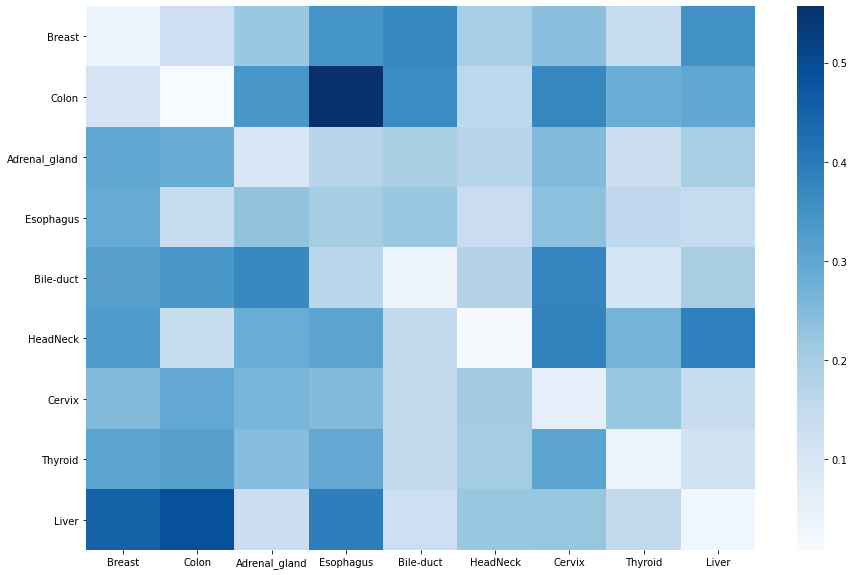

In [2]:
bucket_type = 'top9'
metrics, type_list = read_metric_logs(bucket_type)
a_distances, labels = calculate_affinity_distance(metrics, type_list, beta = 15)
plt.figure(figsize=(15,10))
sns.heatmap(a_distances, xticklabels=labels[0], yticklabels=labels[0], cmap='Blues')
plt.show()

metrics.iloc[0]['stats'][0]

target_type:  Breast
target_type:  Colon
target_type:  Adrenal_gland
target_type:  Esophagus
target_type:  Bile-duct


/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  p_values = u[:,0].astype(np.float32)
/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  p_vectors = v[:,:,0].astype(np.float32)


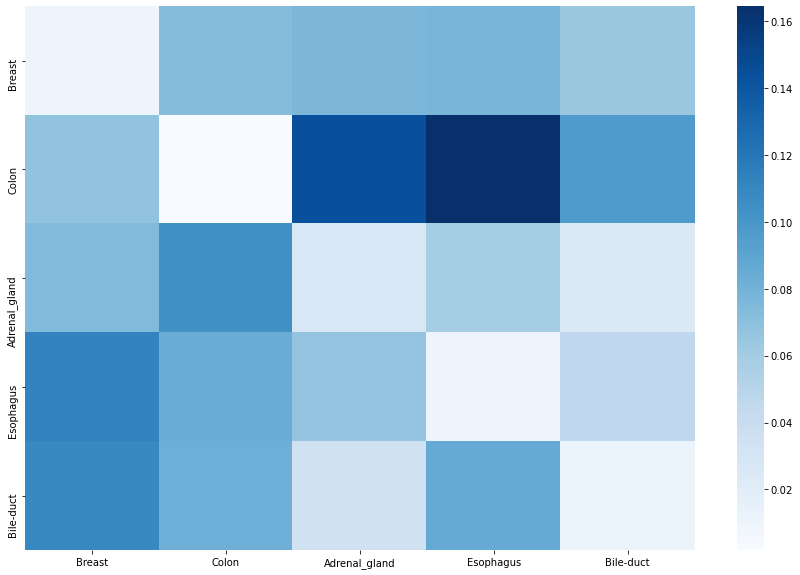

In [3]:
bucket_type = 'top5'
metrics, type_list = read_metric_logs(bucket_type)
a_distances, labels = calculate_affinity_distance(metrics, type_list, beta = 15)
plt.figure(figsize=(15,10))
sns.heatmap(a_distances, xticklabels=labels[0], yticklabels=labels[0], cmap='Blues')
plt.show()

target_type:  Breast
target_type:  Colon
target_type:  Adrenal_gland
target_type:  Esophagus
target_type:  Bile-duct
target_type:  HeadNeck
target_type:  Cervix
target_type:  Thyroid
target_type:  Liver
target_type:  Testis
target_type:  Pancreatic
target_type:  Skin
target_type:  Uterus
target_type:  Lung
target_type:  Prostate
target_type:  Ovarian
target_type:  Stomach
target_type:  Bladder
target_type:  Kidney


/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  p_values = u[:,0].astype(np.float32)
/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/utils/task_affinity.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  p_vectors = v[:,:,0].astype(np.float32)


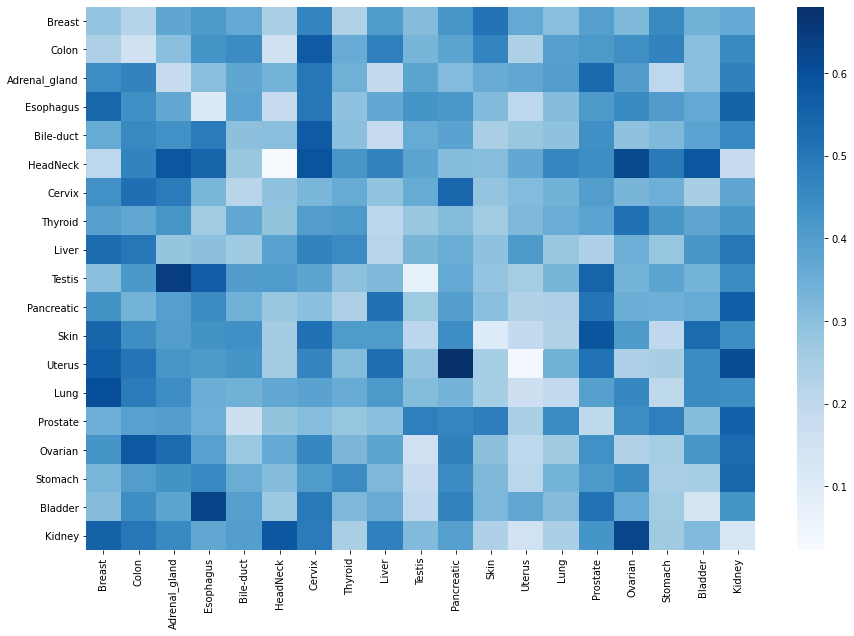

In [5]:
bucket_type = 'top19'
metrics, type_list = read_metric_logs(bucket_type)
a_distances, labels = calculate_affinity_distance(metrics, type_list, beta = 20)
plt.figure(figsize=(15,10))
sns.heatmap(a_distances, xticklabels=labels[0], yticklabels=labels[0], cmap='Blues')
plt.show()

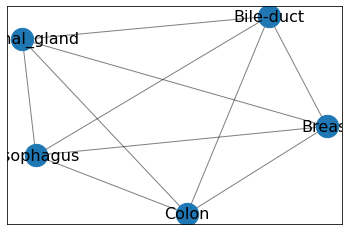

In [281]:
# Visaulize the affinity distance as weighted graph
import networkx as nx
import matplotlib.pyplot as plt
weight = 1
G = nx.Graph()
G.add_nodes_from(labels[0])
for i in range(len(labels[0])):
    for j in range(len(labels[0])):
        G.add_edge(labels[0][i], labels[0][j], weight=a_distances[i,j] * weight)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16)


plt.show()


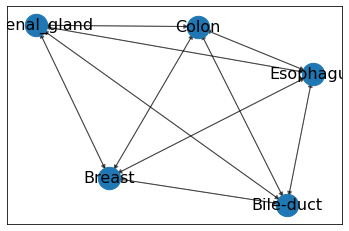

In [283]:
import networkx as nx
import matplotlib.pyplot as plt
weight = 1
G = nx.DiGraph()
G.add_nodes_from(labels[0])
for i in range(len(labels[0])):
    for j in range(len(labels[0])):
        G.add_edge(labels[0][i], labels[0][j], weight=a_distances[i,j] * weight)

# Visualize affinity distances as a weighted directed graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16)
plt.show()


In [ ]:
# Check if file exists
import os
if os.path.exists('/l/users/shikhar.srivastava/workspace/hover_net/taskonomy/data/taskonomy_data/taskonomy_data_top9.pkl'):
    print('File exists')
else:
    print('File does not exist')